In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

## Tasks to do
* try to learn neural network adding two binary numbers or performing multiplication by *two*,
* what would happened if we changed input function to `sin(70*x)*exp(x)`, how to fix this?

Task 1 : Multiplication by 2

In [5]:
X = torch.tensor([[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0] ,[1,1,1]], dtype=torch.float32)
y = torch.tensor([[0,0,0,0], [0,0,1,0], [0,1,0,0], [0,1,1,0], [1,0,0,0], [1,0,1,0], [1,1,0,0] ,[1,1,1,0]], dtype=torch.float32)

class Multiply_by_2(torch.nn.Module):
    # constructor
    def __init__(self, hidden_size):
        super(Multiply_by_2, self).__init__()
        self.hidden_layer = nn.Linear(3, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 4)
        self.sigmoid = nn.Sigmoid()
    # mathod called once the model is executed
    def forward(self, x):
        x = self.output_layer(x)
        return x


# define model and learnig scheme
model = Multiply_by_2(hidden_size=3)
optimizer = optim.SGD(model.parameters(), lr=0.01)
MSE = nn.MSELoss()

# train
N_epochs = 10000

train_loss = []
model.train()  # turn on the training mode
for _ in range(N_epochs):
    # this will zero out the gradients for this batch
    optimizer.zero_grad()
    # make predictions
    y_pred = model(X)
    # calculate the MSE loss
    loss = MSE(y_pred, y)
    # backpropagate the loss
    loss.backward()
    # update the model weights (with assumed learning rate)
    optimizer.step()
    train_loss.append(loss.item())

model.eval()

for i, x in enumerate(X):
    print(f"{int(x[0])},{int(x[1])},{int(x[2])} -> {int(round(model(x)[0].item(),0))},{int(round(model(x)[1].item(),0))},{int(round(model(x)[2].item(),0))},{int(round(model(x)[3].item(),0))}")



0,0,0 -> 0,0,0,0
0,0,1 -> 0,0,1,0
0,1,0 -> 0,1,0,0
0,1,1 -> 0,1,1,0
1,0,0 -> 1,0,0,0
1,0,1 -> 1,0,1,0
1,1,0 -> 1,1,0,0
1,1,1 -> 1,1,1,0


Task 2 : Changing the function

The data is changing very fast so its difficult for the model to follow the changes. By increasing the number of the size of the hidden layer and the number of hidden layers the model may be able to follow this fast changes. Each change is a degree more an linear analisis so we have to put enough.

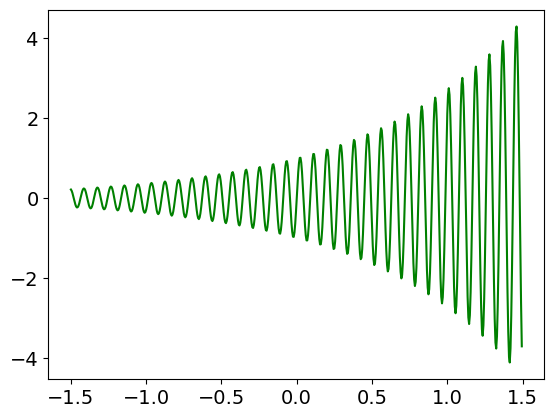

In [3]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

# define regression problem and generate synthetic data
X = torch.arange(-1.5, 1.5, 0.005).view(-1, 1).type(torch.float32)
y = torch.sin(X*70.)*torch.exp(X)
plt.plot(X, y, 'g')
plt.show()

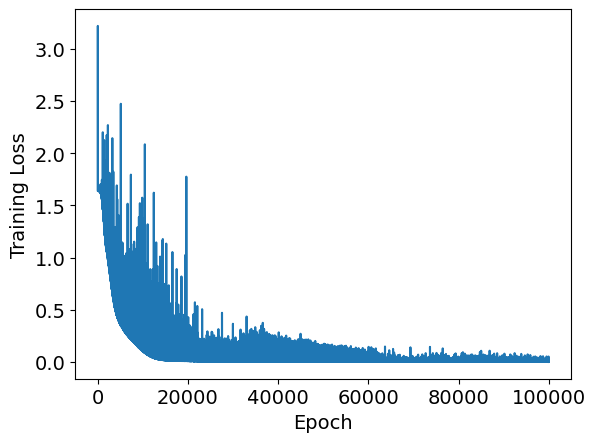

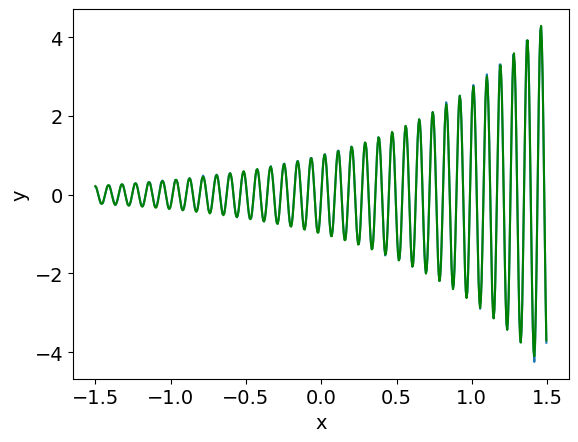

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class ComplexModel(torch.nn.Module):
    def __init__(self, hidden_size):
        super(ComplexModel, self).__init__()
        self.hidden_layer_1st = nn.Linear(1, hidden_size)
        self.hidden_layer_2nd = nn.Linear(hidden_size, hidden_size)
        self.hidden_layer_3rd = nn.Linear(hidden_size, hidden_size)
        self.output_layer = nn.Linear(hidden_size, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.hidden_layer_1st(x)
        x = self.activation(x)
        x = self.hidden_layer_2nd(x)
        x = self.activation(x)
        x = self.hidden_layer_3rd(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x

# Generate synthetic data
X = torch.arange(-1.5, 1.5, 0.005).view(-1, 1).type(torch.float32)
y = torch.sin(X * 70) * torch.exp(X)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ComplexModel(hidden_size=1000).to(device)
X, y = X.to(device), y.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)
N_epochs = 100000

train_loss = []

model.train()
for _ in range(N_epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = nn.MSELoss()(y_pred, y)
    loss.backward()
    optimizer.step()
    train_loss.append(loss.item())

plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

model.eval()
plt.plot(X.cpu(), model(X).cpu().detach(), label= 'Pred')
plt.plot(X.cpu(), y.cpu(), 'g', label = 'real')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
